# Actividad - K-Means

* **Nombre:** José Pablo Martínez Valdivia
* **Matrícula:** A01275676

**Entregar:** Archivo PDF de la actividad, así como el archivo .ipynb en tu repositorio.
**Nota:** Recuerda habrá una penalización de **50** puntos si la actividad fue entregada fuera de la fecha límite.

Carga el conjunto de datos `bestsellers with categories.csv` (se encuentra en el repositorio de la clase) y realiza un análisis estadístico de las variables.

In [44]:
# Carga las librerías necesarias.
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from google.colab import files

In [2]:
# Carga el conjunto de datos al ambiente de Google Colab y muestra los primeros
# 6 renglones.
uploaded = files.upload()
df = pd.read_csv('bestsellers with categories.csv')
df.head(6)

Saving bestsellers with categories.csv to bestsellers with categories.csv


,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction


El conjunto de datos es una tabla que contiene el top 50 de los libros más vendidos por Amazon por año desde 2009 hasta 2019. Cada libro está clasificado como Ficción o No ficción.

Las variables que contiene son:
* **Name**: Nombre del libro.
* **Author**: Autor.
* **User Rating**: Calificación promedio que los usuarios asignaron al libro (1-5).
* **Reviews**: Número de reseñas.
* **Price**: Precio del libro.
* **Year**: Año de publicación.
* **Genre**: Género literario (ficción/no ficción).

## Análisis estadístico
1. Carga la tabla de datos y haz un análisis estadístico de las variables.
* Verifica la cantidad de datos que tienes, las variables que contiene cada vector de datos e identifica el tipo de variables.
* Analiza las variables para saber que representa cada una y en que rangos se encuentran. Si la descripción del problema no te lo indica, utiliza el máximo y el mínimo para encontrarlo.
* Basándote en la media, mediana y desviación estándar de cada variable, ¿qué conclusiones puedes entregar de los datos?
* Calcula la correlación de las variables que consideres relevantes.

In [16]:
# Escribe el código necesario para realizar el análisis estadístico descrito
# anteriorment.
df.info()
df.describe()
ndf = df[['User Rating', 'Reviews', 'Price', 'Year']]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [17]:
ndf.corr()

,User Rating,Reviews,Price,Year
User Rating,1.000000,-0.001729,-0.133086,0.242383
Reviews,-0.001729,1.000000,-0.109182,0.263560
Price,-0.133086,-0.109182,1.000000,-0.153979
Year,0.242383,0.263560,-0.153979,1.000000


¿Cuáles son las variables relevantes e irrelevantes para el análisis?

* El año tiene fuerte correlación pero a mi parecer no es relevante ya que los datos representan el top 50 de cada año así que por la repetición y distribución homogénea puede que las relaciones no representen causalidad.
* El género del libro no es numérico pero lo podemos usar para agrupar.
* Las demás variables numericas parecen no tener relaciones tan fuertes pero puede que encontremos más adelante algo que no se pueda notar a simple vista con este análisis básico
* Las variables del nombre del libro y autor no nos sirven ya que no agrupan o dan información numérica

## Análisis gráfico

Realiza el análisis de las variables usando diagramas de cajas y bigotes, histogramas y mapas de calor.

Responde las siguientes preguntas:
* ¿Hay alguna variable que no aporta información? Si tuvieras que eliminar variables, ¿cuáles quitarías y por qué?
* ¿Existen variables que tengan datos extraños?
* Si comparas las variables, ¿todas están en rangos similares? ¿Crees que esto afecte?
* ¿Puedes encontrar grupos qué se parezcan? ¿Qué grupos son estos?

Haz un análisis estadístico de los datos antes de empezar con la segmentación. Debe contener al menos:
* 1 gráfico de caja (boxplot)
* 1 mapa de calor
* 1 gráfico de dispersión
   
Describe brevemente las conclusiones que se pueden obtener con las gráficas.

Text(0.5, 0.9, 'Distribucion de variables numéricas por género')

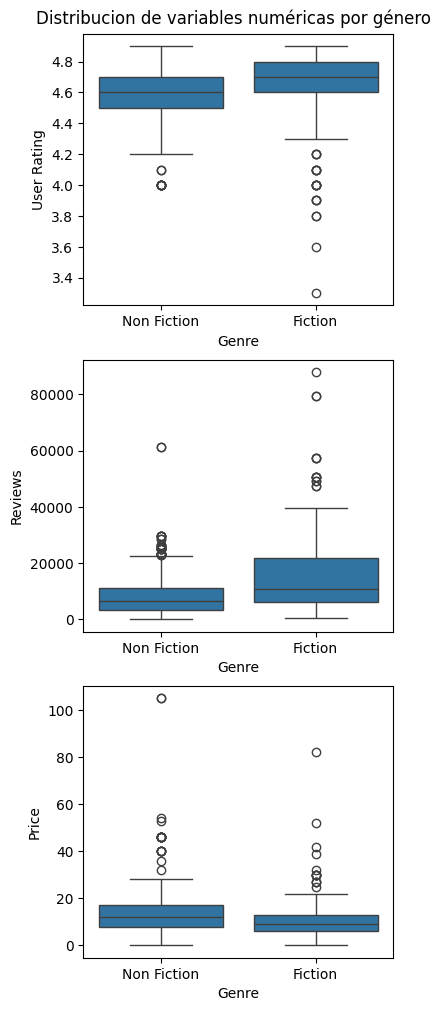

In [42]:
ndf = df.drop(['Name', 'Author', 'Year'], axis=1)
fig, axis = plt.subplots(3,1, figsize=(4,12))
sns.boxplot(data=ndf, y='User Rating', x='Genre', ax=axis[0])
sns.boxplot(data=ndf, y='Reviews', x='Genre', ax=axis[1])
sns.boxplot(data=ndf, y='Price', x='Genre', ax=axis[2])
plt.suptitle('Distribucion de variables numéricas por género', y=0.9)

<ipython-input-32-ccd063d44f34>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=ndf.corr(), annot=True)


<Axes: >

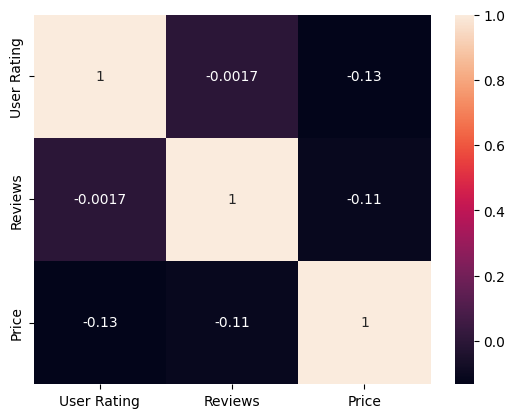

In [32]:
sns.heatmap(data=ndf.corr(), annot=True)

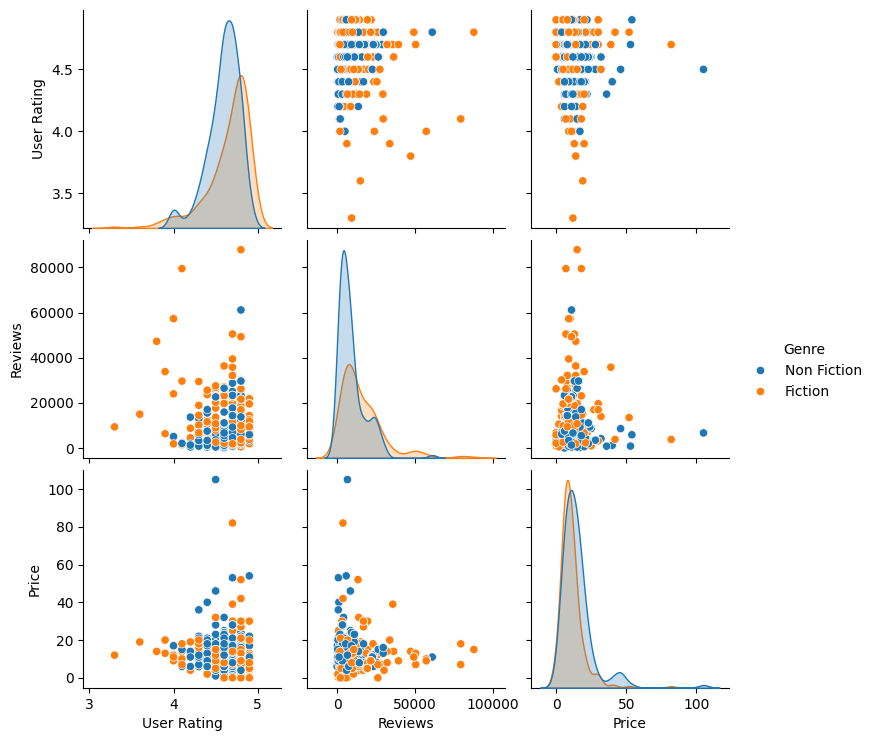

In [43]:
sns.pairplot(data=ndf, hue='Genre')

La cantidad de reviews parece tener problemas devido a la distribución de la cantidad de estas. Parece tener una correlación baja con el Rating pero la cantidad de outliers y la distribución de los valores, hace dificil notar relaciones.

## Clústering

Una vez que hayas realizado un análisis preliminar, haz una segmentación utilizando el método de K-Means. Justifica el número de clusters que elegiste.
* Determina un valor de $k$
* Calcula los centros de los grupos resultantes del algoritmo k-means

Basado en los centros responde las siguientes preguntas
- ¿Crees que estos centros puedan ser representativos de los datos? ¿Por qué?
- ¿Cómo obtuviste el valor de $k$ a usar?
- ¿Los centros serían más representativos si usaras un valor más alto? ¿Más bajo?
- ¿Qué pasaría con los centros si tuviéramos muchos outliers en el análisis de cajas y bigotes?
- ¿Qué puedes decir de los datos basándose en los centros?

In [52]:
# Implementa el algoritmo de kmeans y justifica la elección del número de
# clusters. Usa las variables numéricas.
num_cols = ['User Rating', 'Reviews', 'Price']
X = df.loc[:, num_cols]

scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

X_norm = pd.DataFrame(X_norm, columns=num_cols)
X_norm.head()

,User Rating,Reviews,Price
0,0.359990,0.460453,-0.470810
1,-0.080978,-0.844786,0.821609
2,0.359990,0.599440,0.175400
3,0.359990,0.808050,-0.655441
4,0.800958,-0.365880,-0.101547


In [ ]:
kmax = 16
grupos = range(2, kmax)
wcss = []
sil_score = []

for k in grupos:
  model = KMeans(n_clusters=k, random_state = 69)
  clusters = model.fit_predict(X_norm)
  wcss.append(model.inertia_)
  sil_score.append(silhouette_score(X_norm, clusters))


Text(0.5, 1.0, 'Silhouette Score')

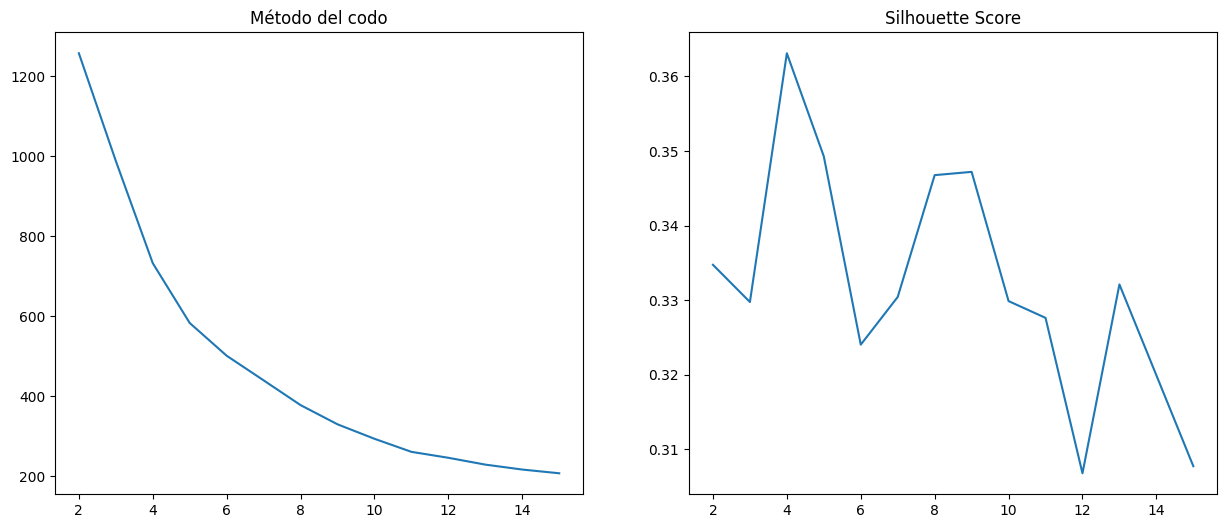

In [55]:
fig, axis = plt.subplots(1,2, figsize=(15,6))

axis[0].plot(grupos, wcss)
axis[0].set_title('Método del codo')

axis[1].plot(grupos, sil_score)
axis[1].set_title('Silhouette Score')

In [62]:
# Según el método del codo 5 grupos parece un buen valor para el análisis
model = KMeans(n_clusters=5, random_state=69)
clusters = model.fit_predict(X_norm)

df['Grupo'] = clusters.astype('str')
df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Name,Author,User Rating,Reviews,Price,Year,Genre,Grupo
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction,1
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction,2
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction,1
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction,1
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction,2


Text(0.5, 1.05, '5 grupos de libros')

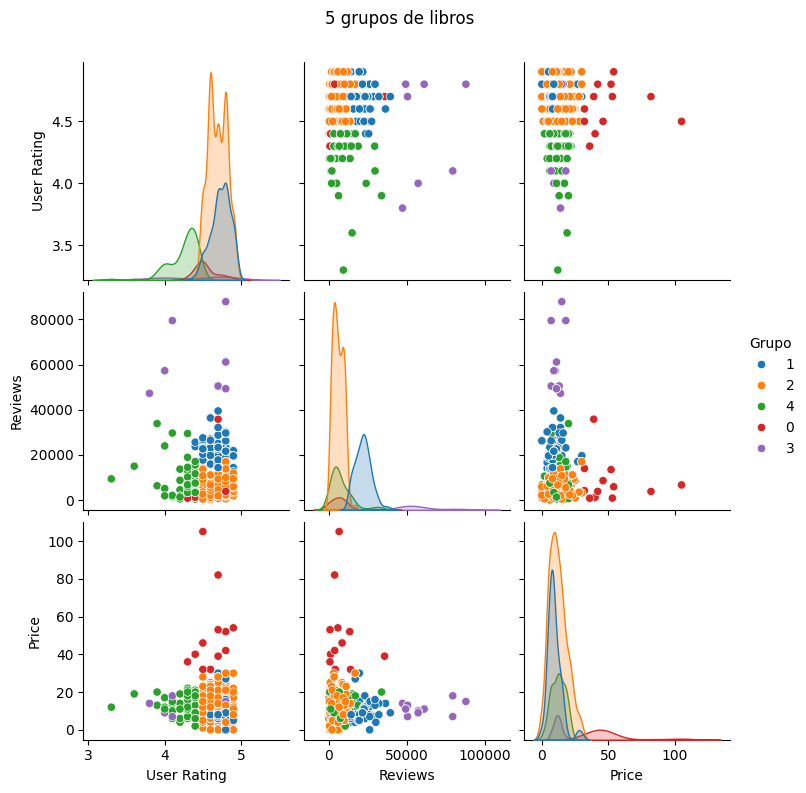

In [65]:
sns.pairplot(data=df.drop('Year', axis=1), hue='Grupo', palette='tab10')
plt.suptitle('5 grupos de libros', y=1.05)

<ipython-input-64-b81afb4c320f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Grupo').mean()


,User Rating,Reviews,Price,Year
Grupo,,,,
0,4.538462,7219.538462,49.692308,2012.846154
1,4.731206,21923.730496,9.312057,2015.375887
2,4.690845,5984.271127,11.940141,2013.700704
3,4.412500,58490.375000,11.687500,2014.687500
4,4.243373,7951.469880,12.313253,2012.915663


Analiza las características de cada grupo. ¿Qué nombre le pondrías a cada segmento?

* Grupo 0: Libros de precio alto, aprox 7200 reviews con puntaje de aprox 4.5

* Grupo 1: libros de precios bajos, aprox 21k reviews con puntaje de aprox 4.7

* Grupo 2: libros de precios medios, aprox 6k reviews con puntaje de aprox 4.6

* Grupo 3: libros de precios medio-bajo, aprox 58k reviews con puntaje de aprox 4.4

* Grupo 4: libros de precios medio-altos, aprox 7900 reviews con puntaje de aprox 4.2

In [70]:
# Haz un análisis por grupo para determinar las características que los hace
# únicos. Ten en cuenta todas las variables numéricas.
df.groupby('Grupo').mean()

<ipython-input-70-c31c2f5bd7e4>:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,User Rating,Reviews,Price,Year
Grupo,,,,
0,4.538462,7219.538462,49.692308,2012.846154
1,4.731206,21923.730496,9.312057,2015.375887
2,4.690845,5984.271127,11.940141,2013.700704
3,4.412500,58490.375000,11.687500,2014.687500
4,4.243373,7951.469880,12.313253,2012.915663


In [71]:
df.groupby('Grupo').std()

<ipython-input-71-84961f08147d>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,User Rating,Reviews,Price,Year
Grupo,,,,
0,0.144435,6978.798305,18.750508,2.693582
1,0.123713,5136.959857,5.227858,2.679390
2,0.119424,3377.196054,6.615108,3.252376
3,0.411299,12743.848100,2.891799,2.358495
4,0.198895,7223.612837,5.072469,3.132072


In [69]:
# Grafica los grupos con un pairplot y con un scatterplot en 3D
# (si es necesario). Analiza las características de cada grupo.
import plotly.express as px

fig = px.scatter_3d(df, x='User Rating', y='Reviews', z='Price', title='5 grupos de libros', color='Grupo', color_discrete_sequence=px.colors.qualitative.D3)
fig.show()